<a href="https://colab.research.google.com/github/CanopySimulations/canopy-python-examples/blob/master/loading_vector_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Upgrade Runtime
This cell ensures the runtime supports `asyncio` async/await, and is needed on Google Colab. If the runtime is upgraded, you will be prompted to restart it, which you should do before continuing execution.

In [0]:
!pip install "ipython>=7"

# Set Up Environment

### Import required libraries

In [0]:
!pip install -q 'canopy==7.2'

In [0]:
import canopy
import logging
import matplotlib.pyplot as plt

logging.basicConfig(level=logging.INFO)

### Authenticate

In [0]:
authentication_data = canopy.prompt_for_authentication()

def create_session():
    return canopy.Session(authentication_data)

# Set Up Example

Run a quick ApexSim exploration.

In [0]:
async with create_session() as session:
    logging.info('Loading configs...')

    default_car = await canopy.load_default_config(
        session, 'car', 'Canopy F1 Car 2019')
    
    default_weather = await canopy.load_default_config(
        session, 'weather', '25 deg, dry')
    
    default_exploration = await canopy.load_default_config(
        session, 'exploration', 'Automated Test Monte Carlo')

    # We'll run a very small exploration for this example
    default_exploration.data.design.numberOfPoints = 3

    logging.info('Creating study...')

    study_id = await canopy.create_study(
        session,
        'apexSim',
        'Loading Vector Results Example',
        [
            default_car,
            default_weather,
            default_exploration,
        ])
    
    logging.info('Waiting for study to complete...')

    wait_result = await canopy.wait_for_study(
        session,
        study_id,
        timeout_seconds=300)
    
logging.info('Sim Version: {}'.format(wait_result.document.sim_version))    
logging.info('Succeded Simulations: {}/{}'.format(
    wait_result.succeeded_simulation_count, 
    wait_result.simulation_count))

INFO:root:Loading configs...
INFO:root:Creating study...
INFO:root:Waiting for study to complete...
INFO:root:Sim Version: 1.3043
INFO:root:Succeded Simulations: 3/3


# Example: Loading Vector Results

## Loading for a single job
We can load the vector results for an individual job by passing a list of channel names to the `load_study_job` function. Note we are specifically loading the `ApexSim` vector results here. If we also wanted the `StraightSim` results we can fetch them in a second call.

In [0]:
async with create_session() as session:
    job_0 = await canopy.load_study_job(
        session,
        study_id,
        'ApexSim',
        job_index=0,
        channel_names=[
            'vCar',
            'hRideF',
            'hRideR'
        ])
    
job_0.vector_data

INFO:canopy.load_study_job:Loading job index 0


,vCar,hRideF,hRideR
0,9.893635,0.031235,0.140367
1,11.929506,0.030785,0.140250
2,13.963860,0.030070,0.139910
3,15.981461,0.029477,0.139533
4,17.988907,0.028906,0.139114
5,19.990549,0.028325,0.138653
6,21.988804,0.027737,0.138133
7,23.985342,0.027161,0.137498
8,25.982544,0.026748,0.136490
9,27.978153,0.026093,0.135750


We can request individual vector results in our desired units:

In [0]:
job_0.vector_as('hRideF', 'mm')

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


0     31.234840
1     30.784773
2     30.069689
3     29.477224
4     28.905968
5     28.324656
6     27.737003
7     27.161366
8     26.747913
9     26.093294
10    25.392572
11    24.658520
12    23.894985
13    23.114182
14    22.328281
15    21.611589
16    20.842154
17    20.019625
18    19.164249
19    18.267176
20    17.343460
21    16.402256
22    15.488873
23    14.489564
24    13.465039
25    12.416490
26    11.345590
27    10.289450
28     9.190586
29     8.059070
30     6.905836
31     5.730466
32     4.558745
33     3.341289
34     2.099145
35     0.831403
36    -0.442209
37    -1.771005
38    -3.197823
39    -4.711307
40    -6.264752
41    -7.896158
Name: hRideF, dtype: float32

You can also use the `vector_as` function and omit the units, which will then use the preferred units saved in your Canopy account:

In [0]:
job_0.vector_as('hRideF')

0     0.031235
1     0.030785
2     0.030070
3     0.029477
4     0.028906
5     0.028325
6     0.027737
7     0.027161
8     0.026748
9     0.026093
10    0.025393
11    0.024659
12    0.023895
13    0.023114
14    0.022328
15    0.021612
16    0.020842
17    0.020020
18    0.019164
19    0.018267
20    0.017343
21    0.016402
22    0.015489
23    0.014490
24    0.013465
25    0.012416
26    0.011346
27    0.010289
28    0.009191
29    0.008059
30    0.006906
31    0.005730
32    0.004559
33    0.003341
34    0.002099
35    0.000831
36   -0.000442
37   -0.001771
38   -0.003198
39   -0.004711
40   -0.006265
41   -0.007896
Name: hRideF, dtype: float32

We can then easily plot the results:

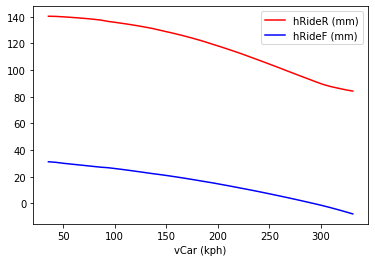

In [0]:
x = job_0.vector_as('vCar', 'kph')

plt.figure()
plt.xlabel('vCar (kph)')
plt.plot(x, job_0.vector_as('hRideR', 'mm'), 'r-', label='hRideR (mm)')
plt.plot(x, job_0.vector_as('hRideF', 'mm'), 'b-', label='hRideF (mm)')
plt.legend()
plt.show()

## Loading for an entire study

We can load the vector results for the entire study by passing a list of channels to the `load_study` function.

We'll also load the study scalar results for context.

In [0]:
async with create_session() as session:
    study = await canopy.load_study(
        session,
        study_id,
        'ApexSim',
        channel_names=[
            'vCar',
            'hRideF',
            'hRideR'
        ],
        include_study_scalar_results=True)

INFO:canopy.load_study_job:Loading job index 0
INFO:canopy.load_study_job:Loading job index 1
INFO:canopy.load_study_job:Loading job index 2


0
1
2


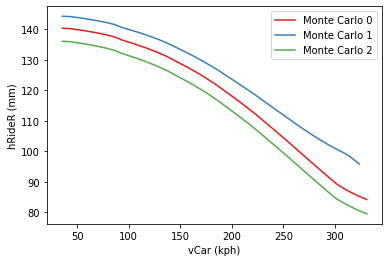

In [0]:
plt.figure()
plt.xlabel('vCar (kph)')
plt.ylabel('hRideR (mm)')

colors = plt.cm.Set1.colors

for index, job in enumerate(study.jobs):
    print(index)
    plt.plot(
        job.vector_as('vCar', 'kph'),
        job.vector_as('hRideR', 'mm'),
        label=job.document.name,
        color=colors[index % len(colors)])
plt.legend()
plt.show()

If we want to understand exactly what changed for these three jobs to produce these results, we can look at the inputs in the scalar results:

In [0]:
study.scalar_results.inputs

,car.chassis.carRunningMass.mCar+,car.chassis.ICar+,car.chassis.hRideFSetup+,car.chassis.hRideRSetup+
0,-3.715169,"[-10.57275296681,0.0,0.0,0.0,-21.14550593362,0...",0.007624,0.015081
1,5.493551,"[3.24032684473,0.0,0.0,0.0,6.48065368946,0.0,0...",0.001032,0.018988
2,-0.085865,"[-5.12879797961,0.0,0.0,0.0,-10.25759595922,0....",0.006958,0.010842
